# Power Production - a Machine Learning project playground

>Author: **Andrzej Kocielski**  

This is a playground notebook for testing only. The actual project notebook is [Powerproduction_ML.ipynb](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git/Powerproduction_ML.ipynb).

For more information see [README.md](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git/README.MD).


___

## Importing libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

## Data set

In [35]:
# Data set is loaded from the file `powerproduction.txt`.
df_raw = pd.read_csv(r"powerproduction.txt")

In [ ]:
# clean the dataset by removing all observations where the power output is zero
df = df_raw[df_raw['power'] !=0]

# assign "speed" and "power" sets to variables X and y
X, y = df["speed"], df["power"]

## Import Seaborn

In [ ]:
# plotting config
plt.style.use('ggplot')
plt.figure(figsize=(12,6))

In [ ]:
sns.relplot(data=df, x="speed", y="power", s=10, height=4, aspect=2)
plt.plot([8,8],[0,120], "k:")
plt.plot([17,17],[0,120], "k:")
plt.plot([24.5,24.5],[0,120], "k:")
plt.text(3, 85, "A", size='20', color='black')
plt.text(12, 85, "B", size='20', color='black')
plt.text(20.5, 55, "C", size='20', color='black')
plt.text(25.2, 55, "F", size='20', color='black')

In [ ]:
# a new dataframe, showing how speed values are separated from each other - difference between subsequent and current speed value
df_sd = pd.DataFrame()
print(df_sd)
for index, row in df.iterrows():
    speed_difference = df.iloc[index]['speed'] - df.iloc[index-1]['speed']
    # print(speed_difference)
    df_sd = df_sd.append({'speed diff': speed_difference}, ignore_index=True)

df_sd = df_sd.drop(index=[0], axis=0)
print(df_sd)  

In [ ]:
df_sd.describe()

In [ ]:
sns.distplot(df_sd)

In [ ]:
# what wind speeds dominate - it appears to be more or less uniformely distributed
plt.figure(figsize=(20,2))
sns.distplot(df.speed, bins=100, kde=False)

In [ ]:
plt.figure(figsize=(20,4))
sns.distplot(df.power, bins=100, kde=False)

In [ ]:
sns.relplot(
    data=df,
    x="speed", y="power",
    kind="line", size_order=["T1", "T2"], palette="pastel",
    height=6, aspect=3, facet_kws=dict(sharex=False)
)

In [ ]:
# Linear regression is an underfitting approximation
plt.figure(figsize=(15,4))
sns.regplot(data=df, x="speed", y="power", scatter_kws={'s':1})

In [ ]:
# clean the dataset by removing all observations where the power output is zero

df_clean = df[df['power'] !=0]
df_clean

In [ ]:
sns.jointplot(x = "speed", y = "power", data = df_clean)

In [ ]:
ord = np.polyfit(df_clean["speed"], df_clean["power"], 3)
print(ord)

# y = pow(df_clean["speed"],ord[0]) + pow(df_clean["speed"],ord[1]) + ord[2]

x = df_clean["speed"]
# plt.ylim([0, 110])
plt.plot(x, df_clean["power"], "b.")
plt.plot(x, ord[0]*pow(x,3) + ord[1]*pow(x,2) + ord[2]*pow(x,1) + ord[3], "r-")


In [ ]:
# Do regression on the x and y arrays using numpy.

coefficients = []
for order in range(9):
    order = order
    coefficients = np.polyfit(df_clean["speed"], df_clean["power"], order)
    print(f"Order {order+1}: ", end="")
    for i in range(order+1):
        print(f"{coefficients[i]:.6f} ", end="  ")
        y = pow(df_clean["speed"],i) 
        
    print("\n")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x=df_clean["speed"], y=df_clean["power"], test_size=0.3, random_state=101)

In [ ]:
# Polynomial regression for cleaned dataset
a_plot = sns.lmplot(data=df_clean, x="speed", y="power", order=9, height=6, aspect=2, scatter_kws={'s':1})

a_plot.set(xlim=(0, 25))
a_plot.set(ylim=(0, 120))

plt.show()

The above polynomial appears to closely follow the pattern of the data points in the domain (wind speed in range 0-25).

Let's now apply the Numpy function `polyfit()` to get the value of the coefficients that minimise the squared order.

In [ ]:
coeff = np.polyfit(df['speed'], df['power'], 9)
#coeff

Testing the above - attempt to reproduce the plot of the polynomial with the above coefficients.

In [ ]:
coeff = np.polyfit(df['speed'], df['power'], 9)
#coeff

#with warnings.catch_warnings():
#    warnings.simplefilter('ignore', np.RankWarning)    
#    y = np.poly1d(coeff)
    
yp = np.poly1d(coeff)
    
x = np.linspace(0, 24.5, 101)
xp = plt.plot(x, yp(x))

plt.xlim(0,25)
plt.ylim(0,120)

plt.rcParams['figure.figsize'] = [15, 6]
plt.show()
print("y = ")
print(yp)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model

In [ ]:
# adapted from https://stackoverflow.com/q/51732577
# create a shorthand for the column names
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)
plt.scatter(X, y, s=2, color='blue', label="data")

# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'cyan', label='1st polynomial order')

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'green', label='2nd polynomial order')

poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'red', label='9th polynomial order')


# Visualising the Polynomial Regression results
plt.legend(loc='best')
# plt.xlim(0,25)
# plt.ylim(0,120)
plt.figure(figsize=(6,3))
plt.show()

In [ ]:
# adapted from https://stackoverflow.com/q/51732577
# create a shorthand for the column names
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)

# Fitting Polynomial Regression to the dataset
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly = poly_reg_2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly = poly_reg_3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)

poly_reg_10 = PolynomialFeatures(degree = 10)
X_poly = poly_reg_10.fit_transform(X)
lin_reg_10 = LinearRegression()
lin_reg_10.fit(X_poly, y)


# Visualising the Polynomial Regression results
plt.scatter(X, y, s=2, color='blue', label="data")
plt.plot(X, lin_reg_2.predict(poly_reg_2.fit_transform(X)), ls="--", color = 'cyan', label='1st polynomial order')
plt.plot(X, lin_reg_3.predict(poly_reg_3.fit_transform(X)), ls="--", color = 'green', label='3rd polynomial order')
plt.plot(X, lin_reg_9.predict(poly_reg_9.fit_transform(X)), ls="--", color = 'red', label='9th polynomial order')
plt.legend(loc='best')
plt.xlim(0,25)
plt.ylim(0,120)
plt.show()

In [ ]:
# adapted from https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_polynomial_regression.html
X = df.iloc[:, 0]
y = df.iloc[:, 1].values.reshape(-1,1)
plt.scatter(X, y, s=2, color='blue', label="data")

X_test = np.array([X**i for i in range(2)]).T
regr = linear_model.LinearRegression()
regr.fit(X_test, y)
plt.plot(X, regr.predict(X_test), ls="--", color = 'cyan', label='1st polynomial order')

X_test = np.array([X**i for i in range(4)]).T
regr = linear_model.LinearRegression()
regr.fit(X_test, y)
plt.plot(X, regr.predict(X_test), ls="--", color = 'green', label='3rd polynomial order')

X_test = np.array([X**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X_test, y)
plt.plot(X, regr.predict(X_test), ls="--", color="red", label='9th polynomial order')

plt.xlim(0,25)
plt.ylim(0,120)
plt.legend(loc='best')

In [ ]:
from scipy.stats import linregress

#help(linregress)
linregress(df)

Where (from the function help file):

slope - Slope of the regression line.

intercept - Intercept of the regression line.

rvalue - Correlation coefficient.

pvalue - Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.

stderr - Standard error of the estimated gradient.

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

In [ ]:
from sklearn.model_selection import train_test_split

# assign "speed" and "power" sets to variables X and y
X, y = df["speed"], df["power"]

# random_state (seed) is set for consistancy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

# convert the array shape and unify the lengths
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

# create an instance of a LinearRegression() model named lin_reg_model.
lin_reg_model = LinearRegression()

#Train/fit lin_reg_model on the training data.
lin_reg_model.fit(X_train, y_train)

In [ ]:
# reschape X_test
X_test = X_test.values.reshape(-1,1)

y_predictions = lin_reg_model.predict(X_test)

In [ ]:
from sklearn import metrics
from math import sqrt

y_predictions = y_predictions.flatten()
print('Mean absolute error (MAE):\t', 
      metrics.mean_absolute_error(y_test, y_predictions), '\t',
      (1./len(y_test))*(sum(abs(y_test-y_predictions))))
print('Mean squared error (MSE):\t', 
      metrics.mean_squared_error(y_test, y_predictions), '\t',
      (1./len(y_test))*(sum((y_test-y_predictions)**2)))
print('Root mean square error (RMSE):\t', 
      metrics.mean_squared_error(y_test, y_predictions, squared=False), '\t',
      sqrt((1./len(y_test))*(sum((y_test-y_predictions)**2))))

---

## Playing with Requests

The `requests` library has been now added to the other imported libraries on top of the notebook.

In [ ]:
url = "https://www.gmit.ie"

# also check https://www.httpbin.org

In [ ]:
res = requests.get(url)
res

In [ ]:
print(dir(res))
print(help(res))

In [ ]:
res.status_code

In [ ]:
print(res.headers)

In [ ]:
print(res.text) # print() is used for better text formating

# Test linear regression script to be put into a separate file

In [ ]:
# import libraries and packages - see description above
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def lin_reg(wind_speed):
    '''
    Doc string to be added here
    '''

    # load the data set from file
    df_raw = pd.read_csv(r"powerproduction.txt")

    # clean the dataset by removing all observations where the power output is zero
    df = df_raw[df_raw['power'] !=0]

    # assign "speed" and "power" sets to variables X and y
    X, y = df["speed"], df["power"]

    # random_state (seed) is set for consistancy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

    # convert the array shape and unify the lengths
    X_train = X_train.values.reshape(-1,1)
    y_train = y_train.values.reshape(-1,1)
    X_test = X_test.values.reshape(-1,1)

    # create an instance of a LinearRegression() model named lin_reg_model.
    lin_reg_model = LinearRegression()

    #Train/fit lin_reg_model on the training data.
    lin_reg_model.fit(X_train, y_train)

    # input wind speed for prediction
    test = np.array([[wind_speed]])
    # test.shape

    # define prediction
    # prediction = lin_reg_model.predict(X_test).values.reshape(-1,1)
    prediction = lin_reg_model.predict(test)
    return float(prediction)
    
lin_reg(20)

# Test poly (7th order) regression script to be put into a separate file

In [ ]:
# import libraries and packages - see description above
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


def poly_reg(wind_speed):
    # Doc string to be added here

    # load the data set from file
    df_raw = pd.read_csv(r"powerproduction.txt")

    # clean the dataset by removing all observations where the power output is zero
    df = df_raw[df_raw['power'] !=0]
    
    # create a shorthand for the column names
    X = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1]
        
    # develop a regression model
    poly = PolynomialFeatures(degree = 7) # 7th polynomial order
    X_poly = poly.fit_transform(X)
    # ask our model to fit the data.
    poly_reg = LinearRegression().fit(X_poly, y)
    # perform regression to predict the power output out of wind speed
    y_pred = poly_reg.predict(X_poly)
    
    # input wind speed for prediction
    x = np.array([[wind_speed]])
    
    # define prediction
    prediction = (-5.11800967e-06*pow(x,7)) + 4.48301902e-04*pow(x,6) - 1.52309426e-02*pow(x,5) + 2.50368085e-01*pow(x,4) - 2.04365136e+00*pow(x,3) + 8.13376871e+00*pow(x,2) - 1.38470256e+01*pow(x,1) + 10.91407191*pow(x,0)
    
    wind_speed = np.array([wind_speed]).reshape((-1, 1))
    print(wind_speed.shape)
    a = PolynomialFeatures(degree=7, include_bias=False).fit_transform(wind_speed)
    print(a.shape)
    print(a)
    y_pred = poly_reg.predict(a)
    print('predicted response: ', y_pred)
    
    return float(prediction)


poly_reg(20)

# Test poly (5th order) regression script to be put into a separate file
---
[https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2](https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2)

(315, 1)
(315,)
(136, 1)
(136,)


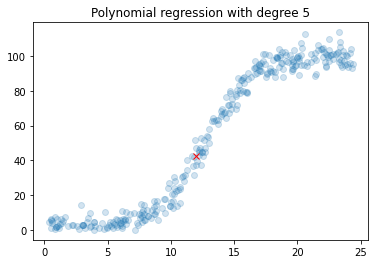

Result: 42.46


In [1]:
# https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
# import libraries and packages - see description above
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def poly_reg(wind_speed):
    # Doc string to be added here

    # load the data set from file
    df_raw = pd.read_csv(r"powerproduction.txt")

    # clean the dataset by removing all observations where the power output is zero
    df = df_raw[df_raw['power'] !=0]

    # assign "speed" and "power" sets to variables X and y
    X, y = df["speed"], df["power"]

    # random_state (seed) is set for consistancy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

    # x-value of test datapoints
    X_seq = np.linspace(X_test.min(),X_test.max(),len(X_test)).reshape(-1,1) # all data points
    sample_size = 20
    X_sample = df.iloc[:, 0].sample(sample_size).values.reshape(-1,1) # random sample of datapints

    # reshape train set
    X_train = X_train.values.reshape(-1,1)
    print(X_train.shape)
    print(y_train.shape)

    # train model
    degree=5 # polynomial order
    polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    polyreg.fit(X_train,y_train)

    # reshape test set
    X_test = X_test.values.reshape(-1,1)
    print(X_test.shape)
    print(y_test.shape)

    # make prediction
    # result = polyreg.predict(X_test)
    result = polyreg.predict([[wind_speed]]) # for a specified wind speed

    # Creating the plot
    plt.figure()
    plt.scatter(X_train,y_train, alpha=.2)
    plt.plot(wind_speed,result,"rx")
    plt.title("Polynomial regression with degree "+str(degree))
    plt.show()
    
    return print(f"Result: {result[0]:.2f}")

poly_reg(12)

---
# linear regression test


In [4]:
test = 17  # test wind speed value


# -------------------------------------
# Linear regression ML script
# -------------------------------------
def lin_reg(wind_speed):
    # Doc string to be added here

    # import libraries and packages
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import PolynomialFeatures

    # load the data set from file
    df_raw = pd.read_csv(r"powerproduction.txt")

    # clean the dataset by removing all observations where the power output is zero
    df = df_raw[df_raw['power'] !=0]

    # assign "speed" and "power" sets to variables X and y
    X, y = df["speed"], df["power"]

    # random_state (seed) is set for consistancy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

    # reshape the train set array
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)

    # create an instance of a LinearRegression() model named lin_reg_model.
    lin_reg_model = LinearRegression()

    # Train/fit lin_reg_model on the training data.
    lin_reg_model.fit(X_train, y_train)

    # convert the the passed wind speed into an array
    x = np.array([[wind_speed]])
    # test.shape

    # make prediction
    result = lin_reg_model.predict([[wind_speed]])

    print(type(result))
    result = str(float(result[0]))
    print(type(result))
    print(result)
    
    return print(f"Simple linear regression prediction for wind speed {test}: \t{result}")
    # return print(result)


lin_reg(test)

<class 'numpy.ndarray'>
<class 'str'>
75.87716851638999
Simple linear regression prediction for wind speed 17: 	75.87716851638999


In [80]:
'''
https://towardsdatascience.com/k-means-clustering-implementation-2018-ac5cd1e51d0a
There are outliers in our data. Outliers are nothing but the values which are far off from other data points and which do not fit in our data and could hinder our accuracy.
'''

# clean the dataset by removing doubious observations

# remove the observations where wind speed is less than 6 and the power output greated than 5 - these readings are considered affected by noise
df = df_raw.drop(df_raw.loc[(df_raw.power > 5) & (df_raw.speed < 6)].index)

# remove the observations where wind speed greater than 10 and power output is zero - these are considered errous readings (e.g. due to maintenance)
df = df.drop(df.loc[(df.power == 0) & (df.speed > 10)].index)

# remove the observations where wind power output is greater than 110 - these are considered errous readings (noise)
df = df.drop(df.loc[(df.power > 110)].index)

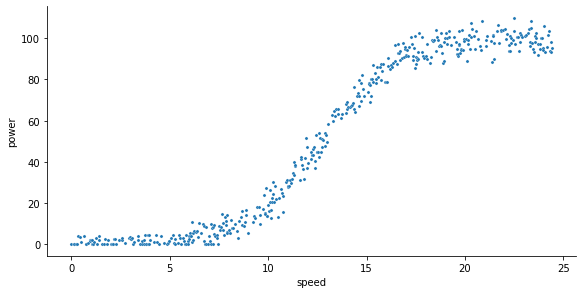

In [34]:
df.shape
sns.relplot(data=df, x="speed", y="power", s=10, height=4, aspect=2)

In [27]:
dftest = pd.DataFrame(np.random.randn(100))

from scipy import stats
dftest[(np.abs(stats.zscore(dftest)) > 2).all(axis=1)]

,0
33,2.171109
59,2.442630
95,2.426829
96,-2.205219
98,-2.086318


# K-means

[https://towardsdatascience.com/k-means-clustering-implementation-2018-ac5cd1e51d0a](https://towardsdatascience.com/k-means-clustering-implementation-2018-ac5cd1e51d0a)

[https://realpython.com/k-means-clustering-python/](https://realpython.com/k-means-clustering-python/)

[[20.10711628 96.92977519]
 [ 9.9803125  20.7075625 ]
 [14.67034286 72.23977143]
 [12.28224    45.36804   ]
 [ 4.79180851  5.04194681]]


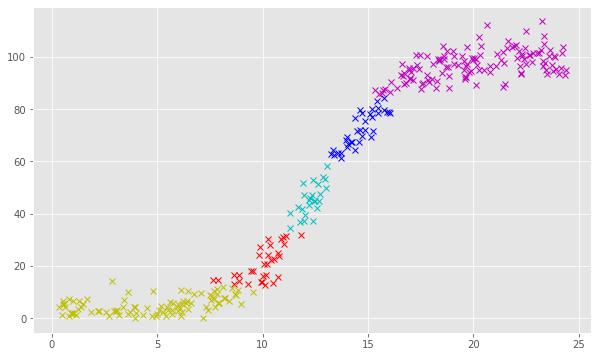

In [97]:
# import libraries and packages
import numpy as np
import pandas as pd
# Machine learning - KMeans
import sklearn.cluster as skcl

# load the data set from file
df_raw = pd.read_csv(r"powerproduction.txt")

# clean the dataset by removing all observations where the power output is zero
df = df_raw[df_raw['power'] !=0]

# assign "speed" and "power" sets to variables X and y
X, y = df["speed"], df["power"]

# random_state (seed) is set for consistancy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

X_kmeans = np.vstack([np.array(X_train), np.array(y_train)]).T

# Apply k-means model and perform fitting
kmeans = skcl.KMeans(n_clusters=5, random_state=2020)
kmeans.fit(X_kmeans)

# centroids of the clusters
print(kmeans.cluster_centers_)

# Plot data points of each cluster
plt.plot(X_kmeans[kmeans.labels_ == 0][:,0], X_kmeans[kmeans.labels_ == 0][:,1], 'mx')
plt.plot(X_kmeans[kmeans.labels_ == 1][:,0], X_kmeans[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(X_kmeans[kmeans.labels_ == 2][:,0], X_kmeans[kmeans.labels_ == 2][:,1], 'bx')
plt.plot(X_kmeans[kmeans.labels_ == 3][:,0], X_kmeans[kmeans.labels_ == 3][:,1], 'cx')
plt.plot(X_kmeans[kmeans.labels_ == 4][:,0], X_kmeans[kmeans.labels_ == 4][:,1], 'yx')



In [ ]:
# np.array(X_test).reshape(-1,len(X_test)).T
# result = kmeans.predict(np.array(X_test).reshape(-1,len(X_test)).T)

X_test.values.reshape(-1, 1)
# result = kmeans.predict(X_test.values.reshape(-1, 1))

In [146]:
# print(np.array(X_test).shape)
print(X_test.values.reshape(-1, 1).shape)


(136, 1)


In [147]:
prediction = kmeans.predict(X_test.values.reshape(-1, 1))

ValueError: Incorrect number of features. Got 1 features, expected 2.